## Imports

In [ ]:
import os, sys
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns

load_dotenv()

DATA_PATH = Path(os.getenv("DATA_PATH"))

# only for .ipynb because relative imports don't work
root_path = (DATA_PATH.parent) 
os.chdir(str(root_path))

import src.training.plotting as p
import src.training.pre_training as t
import src.training.postprocessing as pp

from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

## Prepare Data

In [ ]:
df_music = t.get_music_df()
df_artist = t.get_artist_df()
df_lyric = t.get_lyric_df()

In [ ]:
plot_list = []

In [30]:
y_original = df_music["popularity"]
y_classes = df_music["popularity"].apply(t.encode_popularity)
X = df_music.drop("popularity", axis=1)

# Music

## Distribution of Popularity

In [31]:
# RUS sampled and encoded popularity
X_rus, y_rus = RandomUnderSampler(random_state=42).fit_resample(X, y_classes)

# Include: Unsampled raw / encoded and RUS encoded popularity
plot_list.extend([
    (plt.bar, {"x": list(set(y_classes)), "height": pp.count_distribution(y_classes)},
    "popularity", "count", "Distribution of Popularity classes"),
    (plt.bar, {"x": list(set(y_original)), "height": pp.count_distribution(y_original)},
    "popularity", "count", "Distribution of Popularity raw"),
    (plt.bar, {"x": list(set(y_rus)), "height": pp.count_distribution(y_rus)},
    "popularity", "count", "Distribution of Popularity classes with RUS")]
)

## Music Features vs. Popularity

In [ ]:
# Add each feature plot to list
for name, values in pd.DataFrame(X).items():
    plot_list.append((plt.scatter, {"x": values, "y": y_original},
        name, "popularity", f"Distribution of {name}")
        )

## Density Distribution

f:\SmartGit-Repositories\song-popularity\venv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
f:\SmartGit-Repositories\song-popularity\venv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
f:\SmartGit-Repositories\song-popularity\venv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
f:\SmartGit-Repositories\song-popularity\venv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
f:\SmartGit-Repositories\song-popularity\venv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in l

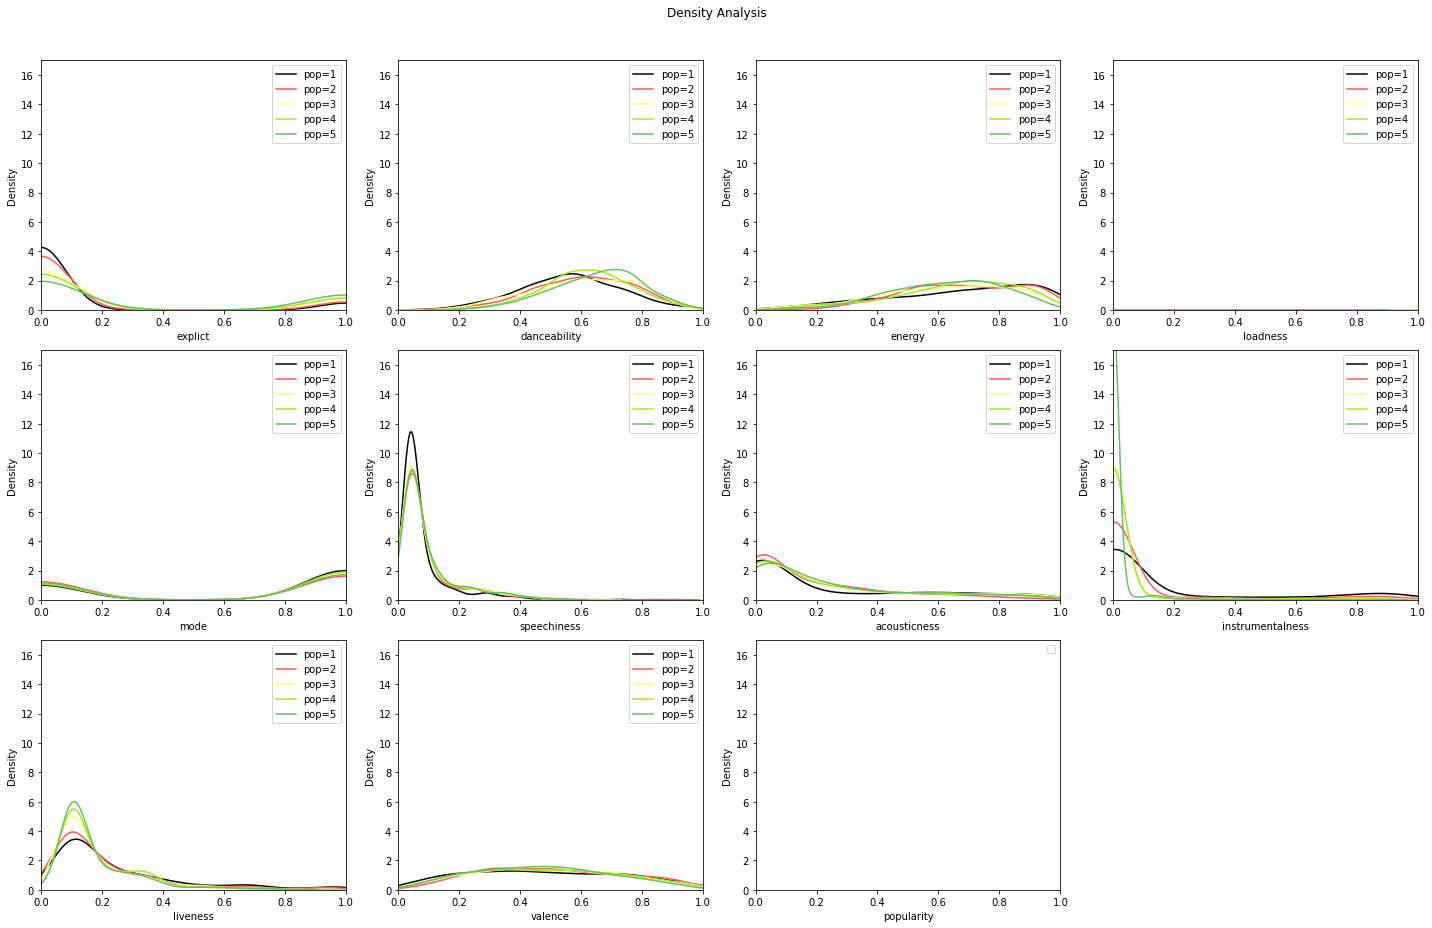

In [32]:
# Use uniform distributed samples X_rus, y_rus
df_density = pd.concat([X_rus, y_rus], axis=1)
# print(df_density[['popularity']].value_counts())

# Drop features with range outside [0, 1]
df_density = pd.DataFrame(df_density).drop(['key', 'time_signature', 'release_year', 'duration_ms', 'tempo'], axis=1)
# print(df_density)

fig = plt.figure(figsize = (20, 25))
j = 0
for i in pd.DataFrame(df_density).columns:
    plt.subplot(6, 4, j+1)
    j += 1

    sns.kdeplot(pd.DataFrame(df_density).query("popularity == 0")[i], color='b', label='pop=0')
    sns.kdeplot(pd.DataFrame(df_density).query("popularity == 1")[i], color='#000000', label='pop=1')
    sns.kdeplot(pd.DataFrame(df_density).query("popularity == 2")[i], color='#ff5959', label='pop=2')
    sns.kdeplot(pd.DataFrame(df_density).query("popularity == 3")[i], color='#fffd86', label='pop=3')
    sns.kdeplot(pd.DataFrame(df_density).query("popularity == 4")[i], color='#a7e81c', label='pop=4')
    sns.kdeplot(pd.DataFrame(df_density).query("popularity == 5")[i], color='#65bf65', label='pop=5')
    plt.legend(loc='best')
    plt.ylim(0, 17)
    plt.xlim(0, 1)

fig.suptitle('Density Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Artists

## Artist Features vs. Popularity

In [ ]:
# scaling
max_followers = df_artist["followers"].max()
df_artist["followers"] = df_artist["followers"].apply(lambda x: x / (max_followers / 100))
df_artist["genre_name"] = df_artist["genre_name"].apply(t.encode_genres)

X_art = df_artist.drop("popularity", axis=1)
y_art = df_artist["popularity"].apply(t.encode_popularity)

# X_art, y_art = RandomUnderSampler(random_state=42).fit_resample(X_art, y_art)


In [ ]:
# Add each feature plot to list
for name, values in pd.DataFrame(X_art).items():
    plot_list.append(
        (plt.scatter, {"x": values, "y": y_art},
        f"Distribution of {name}", name, "popularity")
    )

# Plotting

## Save/display plots

In [ ]:
# params
save_plots = False
n_cols = 2
document_title = "Analysis of popularity regarding all artist features"
document_folder = "all" # lyrics, model, artist, all

# save/display plots as jpg
p.plots_from_list(document_title, plot_list, document_folder, cols=n_cols, save=save_plots)